In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.iloc[:6, :3]

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I
4,0.31,Good,J
5,0.24,Very Good,J


In [4]:
df['cut'].tail(5)

53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, dtype: object

In [5]:
df['Quality-color'] = df['cut'] + ', ' + df['color']
df[['cut', 'color', 'Quality-color']].head()

,cut,color,Quality-color
0,Ideal,E,"Ideal, E"
1,Premium,E,"Premium, E"
2,Good,E,"Good, E"
3,Premium,I,"Premium, I"
4,Good,J,"Good, J"


In [6]:
df.shape
df.dtypes

carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
Quality-color     object
dtype: object

In [7]:
df.describe(include='object')

,cut,color,clarity,Quality-color
count,53940,53940,53940,53940
unique,5,7,8,35
top,Ideal,G,SI1,"Ideal, G"
freq,21551,11292,13065,4884


In [8]:
df_copy = df.copy()
df_copy = df_copy.rename(columns={
    'color': 'diamond_color',
    'clarity': 'diamond_clarity'
})

df_copy.head()

,carat,cut,diamond_color,diamond_clarity,depth,table,price,x,y,z,Quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"Ideal, E"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"Premium, E"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"Good, E"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"Premium, I"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"Good, J"


In [9]:
df_new = df.copy()
df_new.columns = ['new_' + col for col in df_new.columns]
df_new.head()

,new_carat,new_cut,new_color,new_clarity,new_depth,new_table,new_price,new_x,new_y,new_z,new_Quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"Ideal, E"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"Premium, E"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"Good, E"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"Premium, I"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"Good, J"


In [10]:
df_copy2 = df.copy()
df_copy2.drop(df_copy2.columns[1], axis=1, inplace=True)
df_copy2.head()

,carat,color,clarity,depth,table,price,x,y,z,Quality-color
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"Ideal, E"
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"Premium, E"
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"Good, E"
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"Premium, I"
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"Good, J"


In [11]:
df_copy3 = df.copy()
df_copy3.drop(['carat', 'color', 'y'], axis=1, inplace=True)
df_copy3.head()

,cut,clarity,depth,table,price,x,z,Quality-color
0,Ideal,SI2,61.5,55.0,326,3.95,2.43,"Ideal, E"
1,Premium,SI1,59.8,61.0,326,3.89,2.31,"Premium, E"
2,Good,VS1,56.9,65.0,327,4.05,2.31,"Good, E"
3,Premium,VS2,62.4,58.0,334,4.20,2.63,"Premium, I"
4,Good,SI2,63.3,58.0,335,4.34,2.75,"Good, J"


In [12]:
df_copy4 = df.copy()
df_copy4.drop(df_copy4.index[2:53940], axis=0, inplace=True)
print(df_copy4)

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   

  Quality-color  
0      Ideal, E  
1    Premium, E  


In [13]:
sorted_cut = df['cut'].sort_values()
sorted_cut.head(10)

3850     Fair
51464    Fair
51466    Fair
10237    Fair
10760    Fair
14645    Fair
13271    Fair
13270    Fair
22871    Fair
7586     Fair
Name: cut, dtype: object

In [14]:
sorted_prices = df['price'].sort_values(ascending=False)
sorted_prices.head()

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
Name: price, dtype: int64

In [15]:
df_asc = df.sort_values(by='carat', ascending=True)
df_asc.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
31593,0.2,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32,"Premium, E"
31597,0.2,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33,"Ideal, D"
31596,0.2,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33,"Premium, F"
31595,0.2,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30,"Ideal, E"
31594,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28,"Premium, E"


In [16]:
df_desc = df.sort_values(by='carat', ascending=False)
df_desc.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,"Fair, J"
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,"Fair, J"
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,"Fair, H"
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,"Premium, J"
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,"Premium, I"


In [17]:
df_filtered = df[df['carat'] >= 0.3]
df_filtered.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"Good, J"
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,"Good, J"
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,"Ideal, J"
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,"Premium, E"
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68,"Ideal, I"


In [18]:
items = [10, 20, 30, 40, 50]
serie = pd.Series(items)
serie

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [19]:
df_diamonds = df[(df['x'] > 5) & (df['y'] > 5) & (df['z'] > 5)]
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12,"Fair, J"
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,"Fair, J"
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,"Fair, J"
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04,"Fair, F"
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,"Fair, J"
...,...,...,...,...,...,...,...,...,...,...,...
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,"Very Good, G"
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,"Premium, I"
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,"Very Good, E"
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,"Ideal, E"


In [20]:
df_premium_or_ideal = df[(df['cut'] == 'Premium') | (df['cut'] == 'Ideal')]
df_premium_or_ideal

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"Ideal, E"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"Premium, E"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"Premium, I"
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,"Ideal, J"
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,"Premium, F"
...,...,...,...,...,...,...,...,...,...,...,...
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,"Premium, F"
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,"Premium, D"
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"Ideal, D"
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,"Premium, H"


In [21]:
df_cool_diamonds = df[df['cut'].isin(['Fair', 'Good', 'Premium'])]
df_cool_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"Premium, E"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"Good, E"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"Premium, I"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"Good, J"
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,"Fair, E"
...,...,...,...,...,...,...,...,...,...,...,...
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,"Premium, E"
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,"Premium, F"
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,"Premium, D"
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"Good, D"


In [22]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Quality-color'],
      dtype='object')

In [23]:
for index, row in df.iloc[25:30].iterrows():
    print(f"{index} Carat: {row['carat']}, Price: {row['price']}")

25 Carat: 0.23, Price: 354
26 Carat: 0.24, Price: 355
27 Carat: 0.3, Price: 357
28 Carat: 0.23, Price: 357
29 Carat: 0.23, Price: 357


In [24]:
df.dtypes

carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
Quality-color     object
dtype: object

In [25]:
df.select_dtypes(include=['number'])

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
df.describe(include=['float64'])

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [31]:
df.mean(numeric_only=True)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [32]:
temp = df.head(10)
temp.mean(numeric_only=True)

carat      0.246
depth     61.540
table     58.800
price    333.200
x          4.026
y          4.035
z          2.479
dtype: float64

In [34]:
diamonds_by_cut_price = df.groupby('cut')['price'].mean()
print(diamonds_by_cut_price)

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64


In [35]:
summary_stats = df.groupby('cut')['price'].agg(['count', 'min', 'max'])
print(summary_stats)

           count  min    max
cut                         
Fair        1610  337  18574
Good        4906  327  18788
Ideal      21551  326  18806
Premium    13791  326  18823
Very Good  12082  336  18818


<Axes: title={'center': 'Mean Price by Cut'}, xlabel='cut', ylabel='Mean Price'>

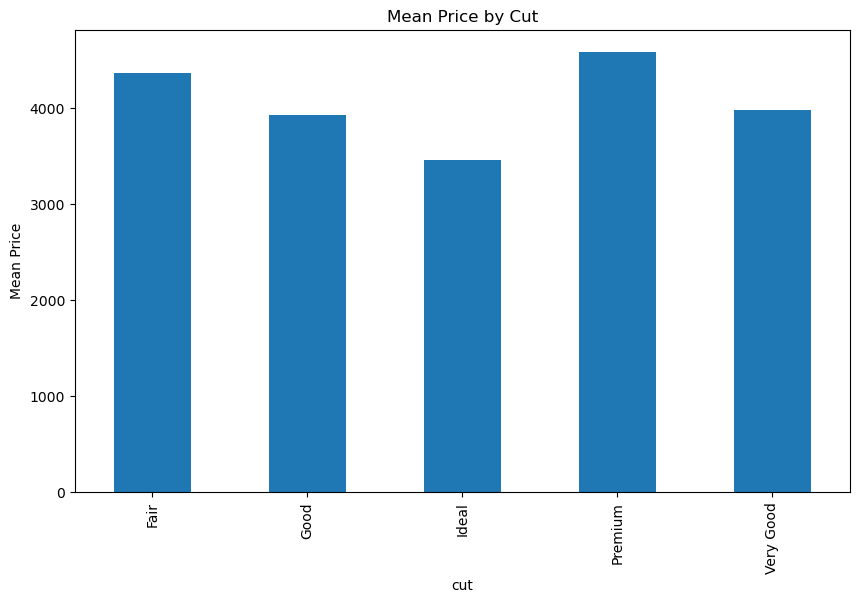

In [36]:
mean_prices = df.groupby('cut')['price'].mean()
mean_prices.plot(kind='bar', figsize=(10, 6), title='Mean Price by Cut', ylabel='Mean Price')

In [38]:
df['cut'].value_counts(normalize=True) * 100

cut
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: proportion, dtype: float64

In [39]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [40]:
df['cut'].nunique()

5